In [1]:
import rebound
import matplotlib.pyplot as plt
import numpy as np

In [159]:
s8 = rebound.Simulationarchive('archive_8.bin')
s7 = rebound.Simulationarchive('archive.bin')
s6 = rebound.Simulationarchive('archive_6.bin')
s5 = rebound.Simulationarchive('archive_5.bin')
s4 = rebound.Simulationarchive('archive_4.bin')

In [161]:
dt = abs(s8[1].t)
num=int(1e7/dt)
a8 = np.zeros(num)
e8 = np.zeros(num)
Om8 = np.zeros(num)
w8 = np.zeros(num)
inc8 = np.zeros(num)
t8 = np.zeros(num)

a7 = np.zeros(num)
e7 = np.zeros(num)
inc7 = np.zeros(num)
w7 = np.zeros(num)
Om7 = np.zeros(num)
t7 = np.zeros(num)

a6 = np.zeros(num)
e6 = np.zeros(num)
inc6 = np.zeros(num)
w6 = np.zeros(num)
Om6 = np.zeros(num)
t6 = np.zeros(num)

a5 = np.zeros(num)
e5 = np.zeros(num)
inc5 = np.zeros(num)
t5 = np.zeros(num)

a4 = np.zeros(num)
e4 = np.zeros(num)
inc4 = np.zeros(num)
w4 = np.zeros(num)
Om4 = np.zeros(num)
t4 = np.zeros(num)

for i in range(num):
    if i%1e4==0:
        print(i)
    
    a8[i] = s8[i].particles[-3].a
    e8[i] = s8[i].particles[-3].e
    w8[i] = s8[i].particles[-3].omega
    Om8[i] = s8[i].particles[-3].Omega
    inc8[i] = s8[i].particles[-3].inc
    t8[i] = s8[i].t
    
    a7[i] = s7[i].particles[-1].a
    e7[i] = s7[i].particles[-1].e
    w7[i] = s7[i].particles[-1].omega
    Om7[i] = s7[i].particles[-1].Omega
    inc7[i] = s7[i].particles[-1].inc
    t7[i] = s7[i].t
    
    a6[i] = s6[i].particles[-3].a
    e6[i] = s6[i].particles[-3].e
    inc6[i] = s6[i].particles[-3].inc
    w6[i] = s6[i].particles[-1].omega
    Om6[i] = s6[i].particles[-1].Omega
    t6[i] = s6[i].t
    
    a5[i] = s5[i].particles[-3].a
    e5[i] = s5[i].particles[-3].e
    inc5[i] = s5[i].particles[-3].inc
    t5[i] = s5[i].t
    
    a4[i] = s4[i].particles[-3].a
    e4[i] = s4[i].particles[-3].e
    inc4[i] = s4[i].particles[-3].inc
    w4[i] = s4[i].particles[-1].omega
    Om4[i] = s4[i].particles[-1].Omega
    t4[i] = s4[i].t

0
10000
20000
30000
40000
50000
60000
70000
80000
90000


In [12]:
print(num)

99992


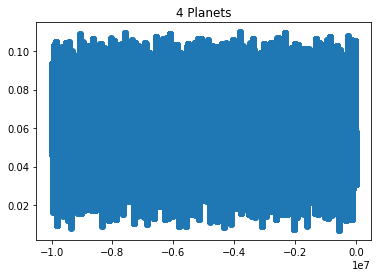

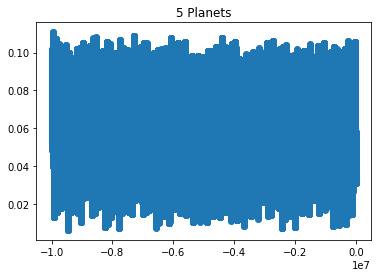

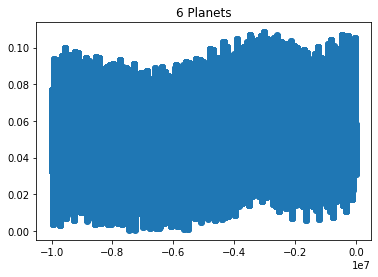

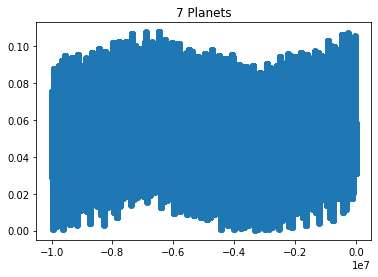

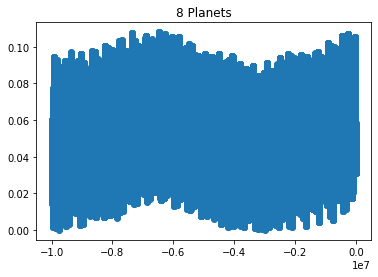

In [162]:
plt.scatter(t4,inc4)
plt.title('4 Planets')
plt.show()
plt.scatter(t5,inc5)
plt.title('5 Planets')
plt.show()
plt.scatter(t6,inc6)
plt.title('6 Planets')
plt.show()
plt.scatter(t7,inc7)
plt.title('7 Planets')
plt.show()
plt.scatter(t8,inc8)
plt.title('8 Planets')
plt.show()

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in true_divide
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in true_divide
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in true_divide
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: divide

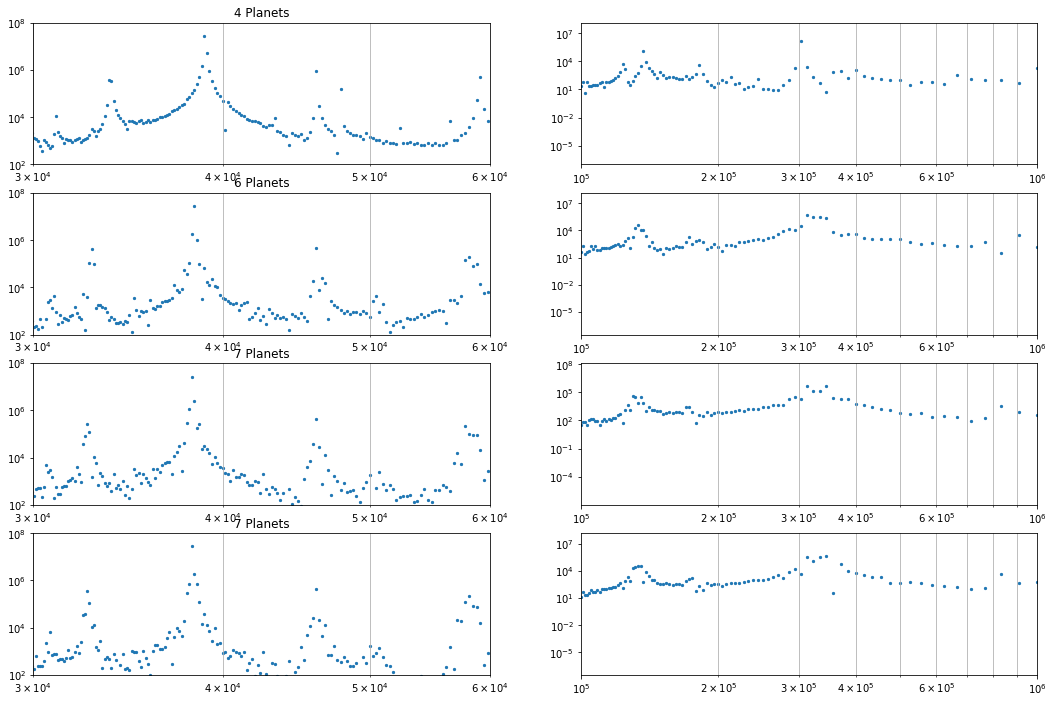

In [166]:
freq = np.fft.fftfreq(num,dt)

pq4 = np.sin(inc4)*np.cos(Om4+w4) + 1j*np.sin(inc4)*np.sin(Om4+w4)
pq6 = np.sin(inc6)*np.cos(Om6+w6) + 1j*np.sin(inc6)*np.sin(Om6+w6)
pq7 = np.sin(inc7)*np.cos(Om7+w7) + 1j*np.sin(inc7)*np.sin(Om7+w7)
pq8 = np.sin(inc8)*np.cos(Om8+w8) + 1j*np.sin(inc8)*np.sin(Om8+w8)

Ypq4 = np.fft.fft(pq4)
Ypq6 = np.fft.fft(pq6)
Ypq7 = np.fft.fft(pq7)
Ypq8 = np.fft.fft(pq8)

#Ypq7[0:100] = 0
#Ypq7[-100:] = 0

fig,ax=plt.subplots(4,2,figsize=(18,12))
ax[0][0].scatter(1/np.flip(freq),np.abs(Ypq4)**2,s=5,alpha=1)
ax[0][0].set_xscale('log')
ax[0][0].set_yscale('log')
ax[0][0].set_xlim(1e4,1e5)
ax[0][0].set_xlim(3e4,6e4)
ax[0][0].set_ylim(1e2,1e8)
ax[0][1].set_xlim(1e5,1e6)
ax[0][1].scatter(1/freq,np.abs(Ypq4)**2,s=5,alpha=1)
ax[0][1].set_xscale('log')
ax[0][1].set_yscale('log')
ax[0][0].set_title('4 Planets')
ax[1][0].set_title('6 Planets')
ax[2][0].set_title('7 Planets')
ax[3][0].set_title('7 Planets')
ax[0][0].grid(which="minor")
ax[0][1].grid(which="minor")
ax[1][0].grid(which="minor")
ax[1][1].grid(which="minor")
ax[2][0].grid(which="minor")
ax[2][1].grid(which="minor")
ax[3][0].grid(which="minor")
ax[3][1].grid(which="minor")
#plt.show()

#fig,ax=plt.subplots(1,2,figsize=(15,4))
ax[1][0].scatter(1/np.flip(freq),np.abs(Ypq6)**2,s=5,alpha=1)
ax[1][0].set_xscale('log')
ax[1][0].set_yscale('log')
ax[1][0].set_xlim(1e4,1e5)
ax[1][0].set_xlim(3e4,6e4)
ax[1][0].set_ylim(1e2,1e8)
ax[1][1].set_xlim(1e5,1e6)
ax[1][1].scatter(1/freq,np.abs(Ypq6)**2,s=5,alpha=1)
ax[1][1].set_xscale('log')
ax[1][1].set_yscale('log')
#plt.show()

#fig,ax=plt.subplots(1,2,figsize=(15,4))
ax[2][0].scatter(1/np.flip(freq),np.abs(Ypq7)**2,s=5,alpha=1)
ax[2][0].set_xscale('log')
ax[2][0].set_yscale('log')
ax[2][0].set_xlim(1e4,1e5)
ax[2][0].set_xlim(3e4,6e4)
ax[2][0].set_ylim(1e2,1e8)
ax[2][1].set_xlim(1e5,1e6)
ax[2][1].scatter(1/freq,np.abs(Ypq7)**2,s=5,alpha=1)
ax[2][1].set_xscale('log')
ax[2][1].set_yscale('log')

ax[3][0].scatter(1/np.flip(freq),np.abs(Ypq8)**2,s=5,alpha=1)
ax[3][0].set_xscale('log')
ax[3][0].set_yscale('log')
ax[3][0].set_xlim(1e4,1e5)
ax[3][0].set_xlim(3e4,6e4)
ax[3][0].set_ylim(1e2,1e8)
ax[3][1].set_xlim(1e5,1e6)
ax[3][1].scatter(1/freq,np.abs(Ypq8)**2,s=5,alpha=1)
ax[3][1].set_xscale('log')
ax[3][1].set_yscale('log')
plt.show()

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == "":


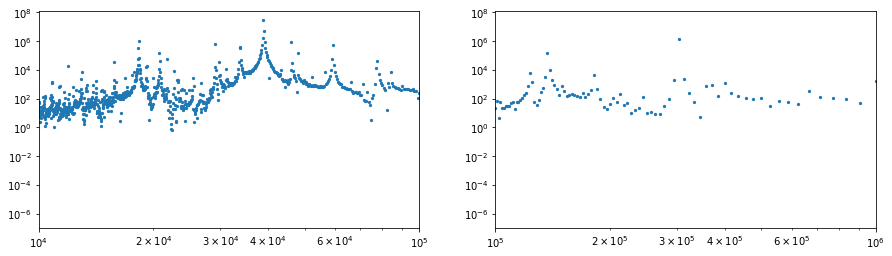

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide


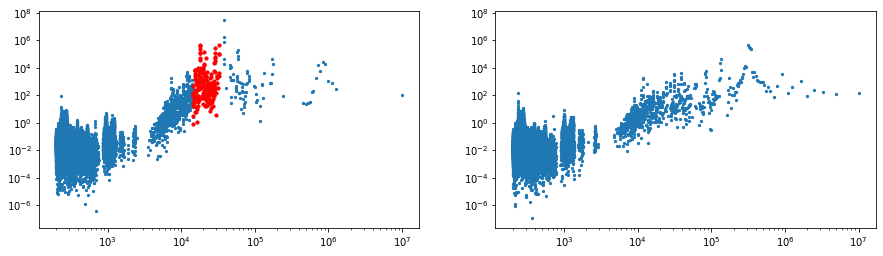

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide


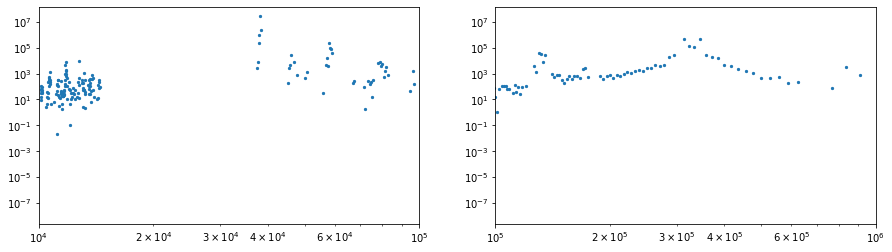

In [107]:
max4 = np.max(np.abs(Ypq4)**2)
max6 = np.max(np.abs(Ypq6)**2)
max7 = np.max(np.abs(Ypq7)**2)


fig,ax=plt.subplots(1,2,figsize=(15,4))
ax[0].scatter(1/np.flip(freq),np.abs(Ypq4)**2,s=5,alpha=1)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlim(1e4,1e5)
ax[1].set_xlim(1e5,1e6)
ax[1].scatter(1/freq,np.abs(Ypq4)**2,s=5,alpha=1)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
plt.show()

fig,ax=plt.subplots(1,2,figsize=(15,4))
nums= np.abs(Ypq6)**2-np.abs(Ypq4)**2*max6/max4
#nums= np.abs(Ypq6)**2
ax[0].scatter(1/np.flip(freq),np.abs(Ypq6)**2-np.abs(Ypq4)**2*max6/max4,s=5,alpha=1)
ax[0].scatter(1/np.abs(freq[99300:99720]),nums[99300:99720],s=10,alpha=1,c='r')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
#ax[0].set_xlim(1e4,1e5)
#ax[1].set_xlim(1e5,1e6)
ax[1].scatter(1/freq,np.abs(Ypq6)**2-np.abs(Ypq4)**2*max6/max4,s=5,alpha=1)
ax[1].scatter(1/(freq[99700:99750]),nums[99700:99750],s=10,alpha=1,c='r')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
plt.show()

fig,ax=plt.subplots(1,2,figsize=(15,4))
ax[0].scatter(1/np.flip(freq),np.abs(Ypq7)**2-np.abs(Ypq4)**2*max7/max4,s=5,alpha=1)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlim(1e4,1e5)
ax[1].set_xlim(1e5,1e6)
ax[1].scatter(1/freq,np.abs(Ypq7)**2-np.abs(Ypq4)**2*max7/max4,s=5,alpha=1)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
plt.show()

In [185]:
Ypq4 = np.fft.fft(pq4)
Ypq6 = np.fft.fft(pq6)
Ypq7 = np.fft.fft(pq7)
Ypq8 = np.fft.fft(pq8)

arg4 = np.argmax(np.abs(Ypq4)**2)
arg6 = np.argmax(np.abs(Ypq6)**2)
arg7 = np.argmax(np.abs(Ypq7)**2)
arg8 = np.argmax(np.abs(Ypq8)**2)

print(arg4,arg6,arg7,arg8)

print(Ypq4[arg4-2:arg4+3],Ypq6[arg6-2:arg6+3],Ypq7[arg7-2:arg7+3],Ypq8[arg8-2:arg8+3])

99734 99730 99729 99729
[ 17.55337269 -705.54018738j  71.89450609-1235.12101942j
  46.68315887-5243.28600832j  25.14372572+2305.07948057j
 -59.73469122 +940.70023774j] [  153.64630351 -296.24384039j  -148.44628085-1371.20989614j
 -4419.75513756-2847.22998695j  1010.73429968  +30.25577444j
   180.41332371 -254.72656068j] [  125.95318859 +534.36092263j   922.31891153 -493.83232444j
 -4957.2619634 -1500.1063023j   -361.48274827-1497.04015706j
  -234.46085931 +343.33644085j] [   77.46781523 +546.26263435j   359.70668424 -774.05053819j
 -4655.23246422-2450.63917758j   538.4161133 -1284.15397149j
  -506.15652984 +653.49196099j]


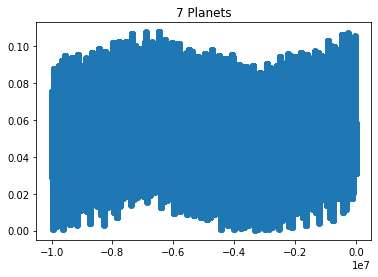

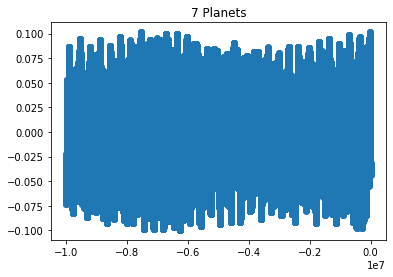

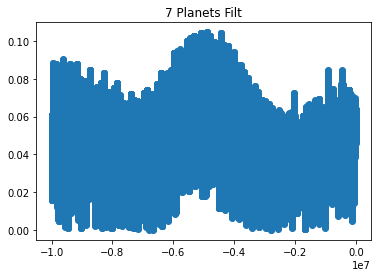

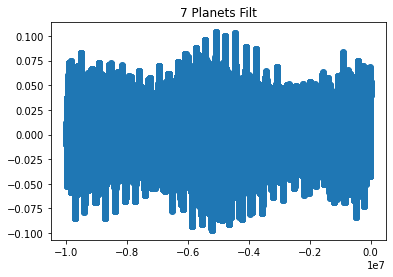

In [170]:
maxind = np.argmax(np.abs(Ypq7)**2)
Ypq7 = np.fft.fft(pq7)
#Ypq7[:maxind-10] = 0
#Ypq7[maxind+10:] = 0
Ypq7[maxind-2:maxind+3] = abs(np.real(Ypq7[maxind-2:maxind+3]))+np.imag(Ypq7[maxind-2:maxind+3])

pq7n = np.fft.ifft(Ypq7)

plt.scatter(t7,inc7)
plt.title('7 Planets')
plt.show()
plt.scatter(t7,pq7)
plt.title('7 Planets')
plt.show()

plt.scatter(t7,np.abs(pq7n))
plt.title('7 Planets Filt')
plt.show()
plt.scatter(t7,(pq7n))
plt.title('7 Planets Filt')
plt.show()

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


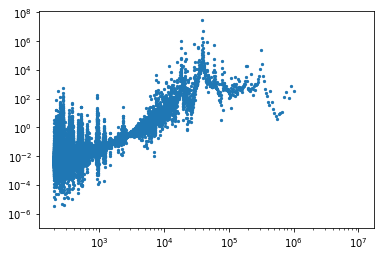

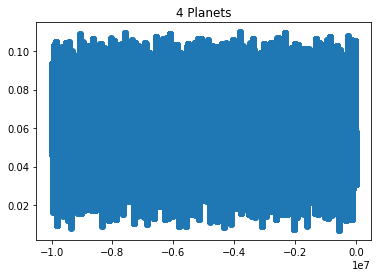

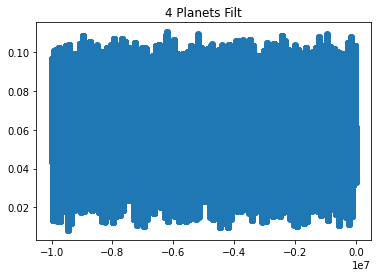

In [125]:
Ypq4 = np.fft.fft(pq4)
Ypq4[arg4] = 0
plt.scatter(1/np.flip(freq),np.abs(Ypq4)**2,s=5)
plt.xscale('log')
plt.yscale('log')
plt.show()
pq4n = np.fft.ifft(Ypq4)

plt.scatter(t4,inc4)
plt.title('4 Planets')
plt.show()
plt.scatter(t4,np.abs(pq4n))
plt.title('4 Planets Filt')
plt.show()

In [39]:
a7l = np.zeros(len(s7))
e7l = np.zeros(len(s7))
inc7l = np.zeros(len(s7))
w7l = np.zeros(len(s7))
Om7l = np.zeros(len(s7))
t7l = np.zeros(len(s7))
for i in range(len(s7)):
    if i%1e5==0:
        print(i)
    a7l[i] = s7[i].particles[-3].a
    e7l[i] = s7[i].particles[-3].e
    w7l[i] = s7[i].particles[-3].omega
    Om7l[i] = s7[i].particles[-3].Omega
    inc7l[i] = s7[i].particles[-3].inc
    t7l[i] = s7[i].t

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


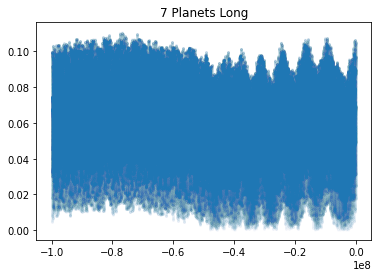

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


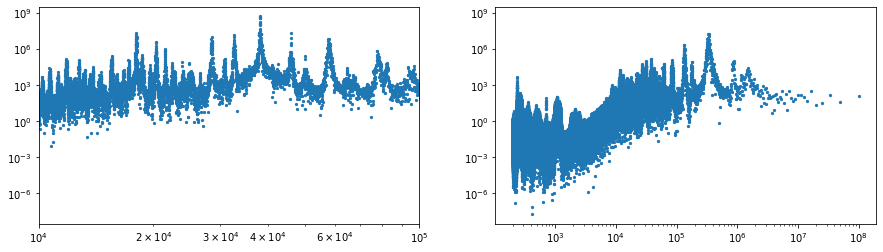

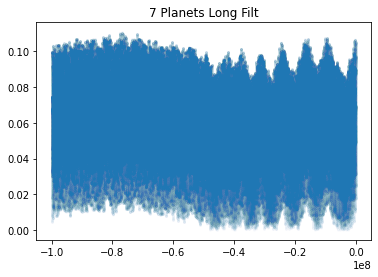

In [66]:
plt.scatter(t7l,inc7l,s=5,alpha=0.01)
plt.title('7 Planets Long')
plt.show()

pq7l = np.sin(inc7l)*np.cos(Om7l+w7l) + 1j*np.sin(inc7l)*np.sin(Om7l+w7l)
Ypq7l = np.fft.fft(pq7l)

#Ypq7l[0:1000] = 0
#Ypq7l[-1000:] = 0

#mid = int(len(freql)/2)
#Ypq7l[mid-490000:mid+490000] = 0
#Ypq7l[-1000:] = 0

freql = np.fft.fftfreq(len(pq7l),-t7l[1])
fig,ax=plt.subplots(1,2,figsize=(15,4))
ax[0].scatter(1/np.flip(freql),np.abs(Ypq7l)**2,s=5,alpha=1)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlim(1e4,1e5)
ax[1].scatter(1/freql,np.abs(Ypq7l)**2,s=5,alpha=1)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
plt.show()

pq7ln = np.fft.ifft(Ypq7l)
plt.scatter(t7l,np.abs(pq7ln),s=5,alpha=0.01)
plt.title('7 Planets Long Filt')
plt.show()

In [59]:
print(len(freql))

1000001


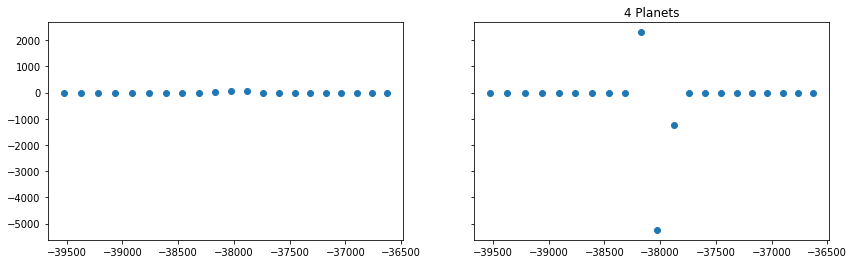

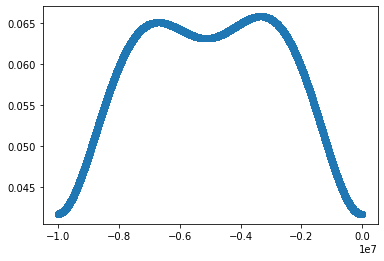

In [230]:
xf = np.zeros(len(freq),dtype=complex)
#xf[maxind-2:maxind+3] = [ 17.55337269 -705.54018738j,  71.89450609-1235.12101942j,  46.68315887-5243.28600832j , 25.14372572+2305.07948057j, -59.73469122 +940.70023774j]
xf[maxind-1:maxind+2] = [71.89450609-1235.12101942j,  46.68315887-5243.28600832j , 25.14372572+2305.07948057j]
#xf[maxind] = 46.68315887-5243.28600832j

fig,ax=plt.subplots(1,2,figsize=(14,4),sharey=True)
ax[0].scatter(1/freq[maxind-10:maxind+11],np.real(xf[maxind-10:maxind+11]))

#plt.xscale('log')
#plt.yscale('log')
#plt.show()
ax[1].scatter(1/freq[maxind-10:maxind+11],np.imag(xf[maxind-10:maxind+11]))
#plt.xscale('log')
plt.title('4 Planets')
plt.show()

xv = np.fft.ifft(xf)
plt.scatter(t7,np.abs(xv))

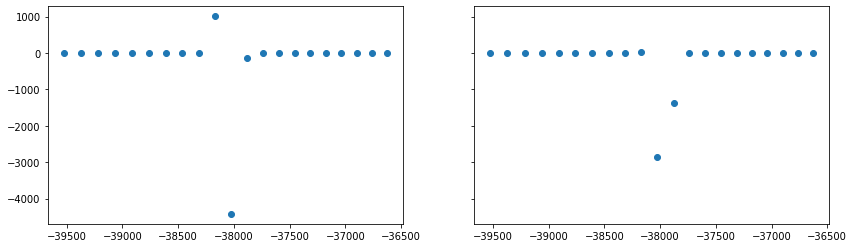

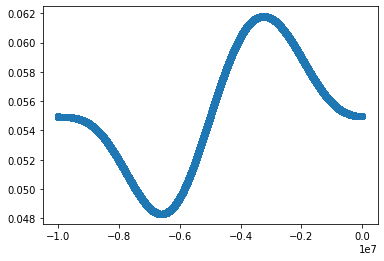

In [220]:
xf = np.zeros(len(freq),dtype=complex)
#xf[maxind-2:maxind+3] =   [  153.64630351 -296.24384039j,  -148.44628085-1371.20989614j, -4419.75513756-2847.22998695j,  1010.73429968  +30.25577444j,   180.41332371 -254.72656068j]
xf[maxind-1:maxind+2] =  [-148.44628085-1371.20989614j, -4419.75513756-2847.22998695j,  1010.73429968  +30.25577444j]
#xf[maxind] =  -4419.75513756-2847.22998695j
fig,ax=plt.subplots(1,2,figsize=(14,4),sharey=True)
ax[0].scatter(1/freq[maxind-10:maxind+11],np.real(xf[maxind-10:maxind+11]))
#plt.xscale('log')
#plt.yscale('log')
#plt.show()
ax[1].scatter(1/freq[maxind-10:maxind+11],np.imag(xf[maxind-10:maxind+11]))
#plt.xscale('log')
plt.title('6 Planets')
plt.show()

xv = np.fft.ifft(xf)
plt.scatter(t7,np.abs(xv))

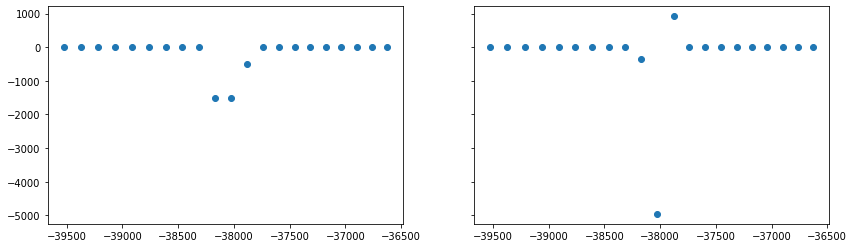

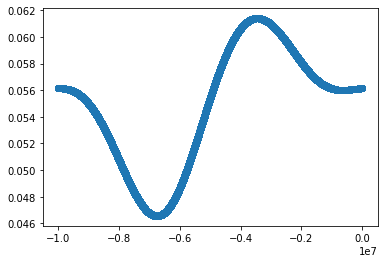

In [219]:
xf = np.zeros(len(freq),dtype=complex)
#xf[maxind-2:maxind+3] =  [  125.95318859 +534.36092263j,   922.31891153 -493.83232444j, -4957.2619634 -1500.1063023j,   -361.48274827-1497.04015706j,  -234.46085931 +343.33644085j]
xf[maxind-1:maxind+2] =  [922.31891153 -493.83232444j, -4957.2619634 -1500.1063023j,   -361.48274827-1497.04015706j]
xf[maxind-1:maxind+2] =  [922.31891153j -493.83232444, -4957.2619634j -1500.1063023,   -361.48274827j-1497.04015706]
#xf[maxind] =  -4957.2619634 -1500.1063023j
fig,ax=plt.subplots(1,2,figsize=(14,4),sharey=True)
ax[0].scatter(1/freq[maxind-10:maxind+11],np.real(xf[maxind-10:maxind+11]))
#plt.xscale('log')
#plt.yscale('log')
#plt.show()
ax[1].scatter(1/freq[maxind-10:maxind+11],np.imag(xf[maxind-10:maxind+11]))
#plt.xscale('log')
plt.show()

xv = np.fft.ifft(xf)
plt.scatter(t7,np.abs(xv))

In [231]:
print(a8[0])

2.242498516282076


In [232]:
st = rebound.Simulationarchive('archive_test.bin')
print(st[-1].t)

-1188800.010853635


In [1]:
import sys
import rebound
archive=rebound.Simulationarchive('archive.bin')
sys.path.insert(1,'../../../src')
import tools
import prop_elem

filename = '../data/Single/1938/archive.bin'
filename = 'archive.bin'
objname= '1938'
flag, a, e, inc, lan, aop, M, t = tools.read_sa_for_sbody(sbody = str(objname), archivefile=filename,nclones=0,tmin=0.,tmax=archive[-1].t)
#p = np.sin(inc)*np.sin(lan+aop)
#q = np.sin(inc)*np.cos(lan+aop)

#h = ecc*np.sin(aop)
#k = ecc*np.cos(aop)
#pe_vals(t,a,h,k,q,p,g_arr,s_arr,small_planets_flag,debug=False)


In [2]:
windows=2
filename = 'Single'
import os
os.chdir('../../../src')
data=prop_elem.prop_calc(objname,filename,windows,debug=True)

../data/Single/1938/archive.bin


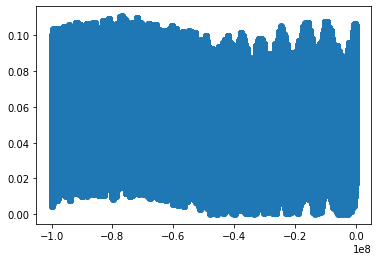

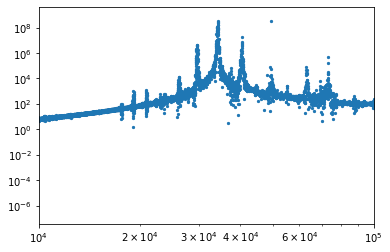

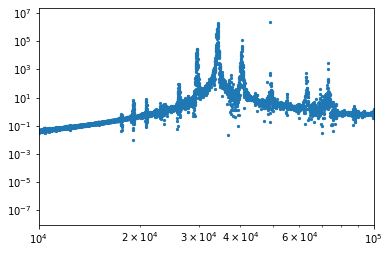

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(t,inc)
plt.show()

from scipy import signal
window = signal.windows.hamming(len(inc))
        #window = signal.windows.general_hamming(n,0.1)
#Yhk_win = Yhk*window

pq = np.sin(inc)*np.cos(lan)+1j*np.sin(inc)*np.sin(lan)

Ypq_win = np.fft.fft(pq)*window

freq = np.fft.fftfreq(len(inc),t[1])
plt.scatter(1/np.flip(freq),np.abs(np.fft.fft(pq))**2,s=5)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e4,1e5)
plt.show()
plt.scatter(1/np.flip(freq),np.abs(Ypq_win)**2,s=5)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e4,1e5)
plt.show()

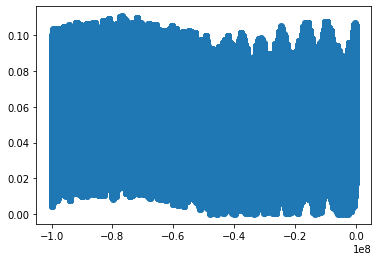

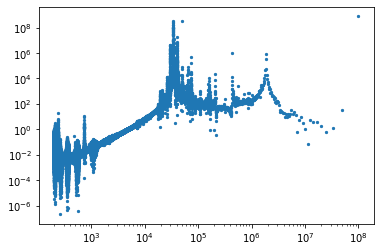

In [5]:
inc_in = np.abs(data[-5]+1j*data[-6])
plt.scatter(t,inc_in)
plt.show()
plt.scatter(1/np.flip(freq),np.abs(np.fft.fft(data[-5]+1j*data[-6]))**2,s=5)
plt.xscale('log')
plt.yscale('log')

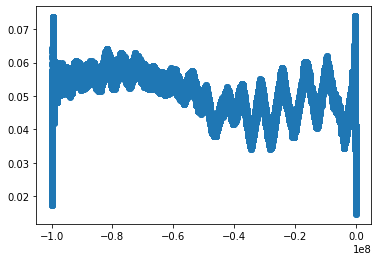

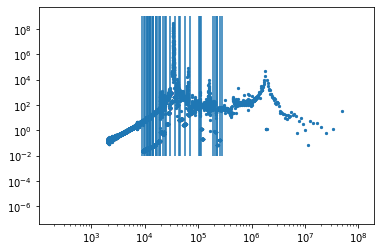

In [6]:
plt.scatter(t,np.abs(np.fft.ifft(data[2])))
plt.show()
#plt.scatter(1/(freq),np.abs(data[2])**2,s=5)
plt.scatter(1/np.flip(freq),np.abs(data[2])**2,s=5)
plt.vlines(1/-np.array(data[-3]),ymin=1e-2,ymax=1e9)
plt.xscale('log')
plt.yscale('log')
#plt.xlim(2e4,6e4)
plt.show()

In [8]:
print(data)
print(0.0527-0.0514)

([2.2327238135718073, 0.1692027298773209, 0.05273798003663006], array([ 0.5        +0.5j       , 11.39728675 -7.87603394j,
       15.65322276-13.77617525j, ..., 13.65840683-11.53797369j,
       14.14406064-10.41628508j, 16.54801958-12.08554171j]), array([ 0.        +0.j        ,  5.67593617+0.28178287j,
       -0.60101549+0.97275014j, ..., -0.2761055 -0.10651767j,
        0.5194819 +0.14848398j, -3.64682718-2.61270422j]), array([-0.13301983, -0.1341338 , -0.12676921, ..., -0.13069602,
       -0.12923491, -0.12944407]), array([-0.08643972, -0.09369552, -0.09228209, ...,  0.06573265,
        0.06179324,  0.06515091]), array([0.00845007, 0.0073674 , 0.00640343, ..., 0.0101909 , 0.01124359,
       0.01256552]), array([-0.05752138, -0.05744471, -0.05709706, ...,  0.05526633,
        0.05526721,  0.05558454]), [-3.289338842234744e-06, -5.5388866826688394e-06, -1.3737238812250876e-05, -3.2793408518328144e-06, -2.178562108580397e-05, -2.3795217156591762e-06, -5.198955009003242e-07, -2.62147308

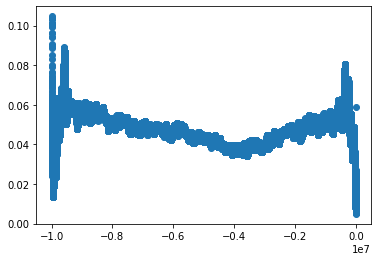

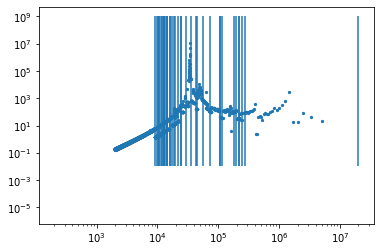

([2.232734418053956, 0.17018815173537483, 0.04703669879353588], array([ -9.61899826-12.37720654j, -11.43743208-10.40559301j,
        -9.82054674-10.45827167j, ..., -11.42160715-11.98551618j,
        -9.85685431-12.45153863j,  -9.94817978-10.93439432j]), array([0.        +0.j        , 4.51801851+1.50746442j,
       5.42142253+4.04074674j, ..., 3.71431063-1.83976156j,
       3.77256195-1.35171868j, 4.19322653-1.08974733j]), array([-0.13301983, -0.1341338 , -0.12676921, ..., -0.06912736,
       -0.06883573, -0.06771828]), array([-0.08643972, -0.09369552, -0.09228209, ..., -0.12206868,
       -0.1203898 , -0.12477432]), array([0.00845007, 0.0073674 , 0.00640343, ..., 0.06630729, 0.06730098,
       0.0684349 ]), array([-0.05752138, -0.05744471, -0.05709706, ...,  0.05488635,
        0.05426249,  0.0536969 ]), [-3.289338842234744e-06, -5.5388866826688394e-06, -1.3737238812250876e-05, -3.2793408518328144e-06, -2.178562108580397e-05, -2.3795217156591762e-06, -5.198955009003242e-07, -2.63447078

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(t[:int(len(t)/10)],np.abs(np.fft.ifft(data[2])))
plt.show()
#plt.scatter(1/(freq),np.abs(data[2])**2,s=5)
freq = np.fft.fftfreq(int(len(inc)/10),t[1])
plt.scatter(1/np.flip(freq),np.abs(data[2])**2,s=5)

freq = np.fft.fftfreq(len(inc),t[1])
plt.vlines(1/-np.array(data[-3]),ymin=1e-2,ymax=1e9)
plt.xscale('log')
plt.yscale('log')
#plt.xlim(2e4,6e4)
plt.show()
print(data)
print(np.median(np.abs(np.fft.ifft(data[2]))[100:-100]))
print(np.mean(np.abs(np.fft.ifft(data[2]))[100:-100]))